In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
x = pd.read_pickle('x.pkl')
y = pd.read_pickle('y.pkl')

In [59]:
df = x.copy()
df['is_closed'] = y
df = df[df['is_fastfood'] == False]
x = df.copy()
del x['is_closed']
y = df['is_closed'].copy()

In [60]:
x.head()

,rating,review_count,0.5m_count,0.5m_count_similar,1m_count,1m_count_similar,2m_count,2m_count_similar,3m_count,3m_count_similar,...,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,WiFi,cuisine_y
1,3.5,182.0,21,9,44,13,98,23,167,35,...,1,0,1,1,2.0,0,0,1,1,25
2,3.5,99.0,5,3,30,11,80,24,136,34,...,0,0,0,1,2.0,0,0,1,0,49
3,3.0,21.0,9,5,32,10,83,16,241,30,...,1,0,0,1,2.0,1,0,1,0,40
5,4.0,9.0,5,1,14,2,45,7,135,15,...,1,0,0,0,1.0,0,0,1,1,0
6,4.5,1550.0,22,3,83,5,165,6,267,7,...,1,0,0,1,2.0,0,1,1,0,6


In [61]:
y.head()

1    0
2    0
3    0
5    0
6    0
Name: is_closed, dtype: int64

In [62]:
sk_best = SelectKBest(chi2, 5)
sk_best.fit(x, y)

SelectKBest(k=5, score_func=<function chi2 at 0x1a19fc92f0>)

In [63]:
sk_best.get_support()

array([False,  True, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10,\
                                                    stratify = y)

In [65]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)
print('Accuracy: ',tree_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test.values,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test.values, y_pred))
dt_scores = cross_val_score(tree_clf, x_train, y_train, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.749552772809
Precision:  0.563636363636
Recall:  0.577639751553
F1 Score:  0.570552147239
Confusion Matrix:
 [[326  72]
 [ 68  93]]
Avg. 10-fold Cross Validation Accuracy:  0.717257598406


In [66]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print('Accuracy: ',rf_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(rf_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.785330948122
Precision:  0.707070707071
Recall:  0.434782608696
F1 Score:  0.538461538462
Confusion Matrix:
 [[369  29]
 [ 91  70]]
Avg. 10-fold Cross Validation Accuracy:  0.768538724984


In [67]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(x_train, y_train)
y_pred = ab_clf.predict(x_test)
print('Accuracy: ',ab_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(ab_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.810375670841
Precision:  0.735042735043
Recall:  0.534161490683
F1 Score:  0.618705035971
Confusion Matrix:
 [[367  31]
 [ 75  86]]
Avg. 10-fold Cross Validation Accuracy:  0.781764567879


In [68]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)
print('Accuracy: ',knn_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(knn_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.697674418605
Precision:  0.460784313725
Recall:  0.291925465839
F1 Score:  0.357414448669
Confusion Matrix:
 [[343  55]
 [114  47]]
Avg. 10-fold Cross Validation Accuracy:  0.681212652129


In [69]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
y_pred = nb_clf.predict(x_test)
print('Accuracy: ',nb_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(nb_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.704830053667
Precision:  0.480769230769
Recall:  0.310559006211
F1 Score:  0.377358490566
Confusion Matrix:
 [[344  54]
 [111  50]]
Avg. 10-fold Cross Validation Accuracy:  0.714492340464


In [70]:
svm_clf = SVC(probability=True)
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)
print('Accuracy: ',svm_clf.score(x_test, y_test))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
dt_scores = cross_val_score(svm_clf, x, y, cv=10)
print('Avg. 10-fold Cross Validation Accuracy: ', np.mean(dt_scores))

Accuracy:  0.719141323792
Precision:  1.0
Recall:  0.0248447204969
F1 Score:  0.0484848484848
Confusion Matrix:
 [[398   0]
 [157   4]]
Avg. 10-fold Cross Validation Accuracy:  0.713062498064


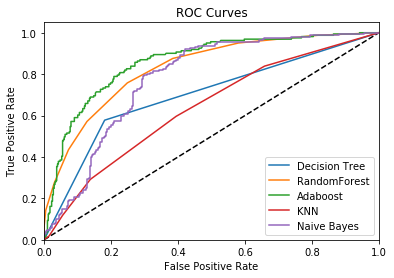

In [71]:
#ROC Curve
y_score_tree = tree_clf.predict_proba(x_test)[:,1]
y_score_rf = rf_clf.predict_proba(x_test)[:,1]
y_score_ab = ab_clf.predict_proba(x_test)[:,1]
y_score_knn = knn_clf.predict_proba(x_test)[:,1]
y_score_nb = nb_clf.predict_proba(x_test)[:,1]
# y_score_svm = svm_clf.predict_proba(x_test)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test,y_score_rf)
fpr_ab, tpr_ab, _ = roc_curve(y_test,y_score_ab)
fpr_knn, tpr_knn, _ = roc_curve(y_test,y_score_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test,y_score_nb)
# fpr_svm, tpr_svm, _ = roc_curve(y_test,y_score_svm)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_tree,tpr_tree,label='Decision Tree')
plt.plot(fpr_rf,tpr_rf,label='RandomForest')
plt.plot(fpr_ab,tpr_ab,label='Adaboost')
plt.plot(fpr_knn,tpr_knn,label='KNN')
plt.plot(fpr_nb,tpr_nb,label='Naive Bayes')
# plt.plot(fpr_svm,tpr_svm,label='SVM')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [72]:
importances = ab_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(20):
    print("%d. %s (%f)" % (f + 1, x.iloc[:,indices[f]].name, importances[indices[f]]))

Feature ranking:
1. review_count (0.180000)
2. 3m_count (0.120000)
3. 3m_count_similar (0.120000)
4. 1m_count (0.060000)
5. cuisine_y (0.040000)
6. 1m_count_similar (0.040000)
7. 2m_count (0.040000)
8. BusinessParking.lot (0.040000)
9. income (0.040000)
10. price_ordinal (0.020000)
11. Ambience.trendy (0.020000)
12. WiFi (0.020000)
13. BusinessParking.garage (0.020000)
14. BusinessParking.street (0.020000)
15. Alcohol (0.020000)
16. is_chain (0.020000)
17. GoodForMeal.dessert (0.020000)
18. GoodForMeal.brunch (0.020000)
19. GoodForMeal.dinner (0.020000)
20. GoodForMeal.latenight (0.020000)


(-1, 10)

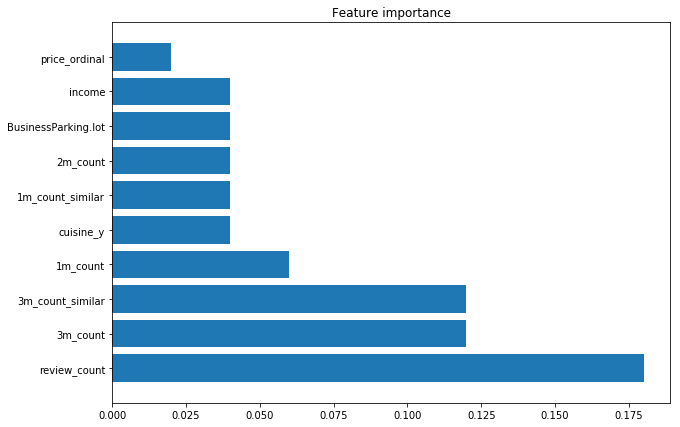

In [73]:
plt.figure(figsize=(10,7))
plt.title("Feature importance")
plt.barh(range(x_test.shape[1])[:10], importances[indices][:10],align="center")
plt.yticks(range(x_test.shape[1])[:10], x.iloc[:,indices].columns)
plt.ylim([-1, 10])

In [74]:
len(x)

2795